# Упражнение на нейронные сети/Keras

In [1]:
from sklearn.datasets import load_boston, load_breast_cancer, load_iris
# boston - regression
# breast - binary
# iris - multiclass
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from statistics import mean
import matplotlib.pyplot as plt
import keras

from keras.utils import np_utils
np.random.seed(7)

/Users/sharafutdinovruslan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Бинарная классификация

In [2]:
# бинарная классификация
data = load_breast_cancer()
X = data.data
y = data.target
# print(y[:10])

In [3]:
# Делим выборку на 5 фолдов
folds = list(
    KFold(n_splits=5, shuffle=True, random_state=1).split(X, y)
)

In [4]:
%%capture
# Зависимость от параметра lr
model = Sequential()
outList = list()
lrGrid = np.linspace(10e-6, 10e-5, 5)
for i in lrGrid:
    print('lr = ', i)
    model.add(Dense(1, activation='sigmoid'))
    adam = Adam(lr=i)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    scoreList = list()
    for j in range(5):
        print('NFold = ', j)
        model.fit(X[folds[j][0]], y[folds[j][0]], epochs=150, batch_size=10)
        scores = model.evaluate(X[folds[j][1]], y[folds[j][1]])
        scoreList.append(scores[1]*100)
    outList.append(mean(scoreList))

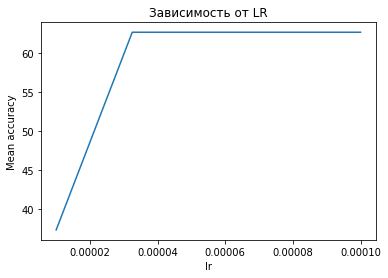

In [5]:
# График
plt.plot(lrGrid, outList)
plt.ylabel('Mean accuracy')
plt.xlabel('lr')
plt.title('Зависимость от LR')
plt.show()

## Регрессия

In [6]:
# регрессия
data = load_boston()
X = data.data
y = data.target
# print(y[:10])

In [7]:
%%capture
# Зависимость от количества слоев (в каждом слое 1 нейрон)
outList = list()
DenseGrid = np.arange(1, 5)
for i in DenseGrid:
    print('Dense = ', i)
    model = Sequential()
    for j in range(i):
        model.add(Dense(1))
    adam = Adam(lr=0.00001)
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['MSE'])
    # делим на тест и трейн
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#     folds = list(KFold(n_splits=2, shuffle=True, random_state=1).split(X, y)) 
#     X_train = list()
#     X_test = list()
#     y_train = list()
#     y_test = list()
#     for j in range(i):
#         X_train.append(X[folds[j][0]])
#         X_test.append(X[folds[j][1]])
#         y_train.append(y[folds[j][0]])
#         y_test.append(y[folds[j][1]])
    model.fit(X_train, y_train, epochs=150, batch_size=10)
    scores = model.evaluate(X_test, y_test)
    outList.append(scores[1])
;

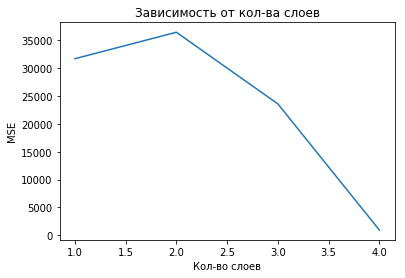

In [8]:
# График
plt.plot(DenseGrid, outList)
plt.ylabel('MSE')
plt.xlabel('Кол-во слоев')
plt.title('Зависимость от кол-ва слоев')
plt.show()